[*********************100%***********************]  1 of 1 completed


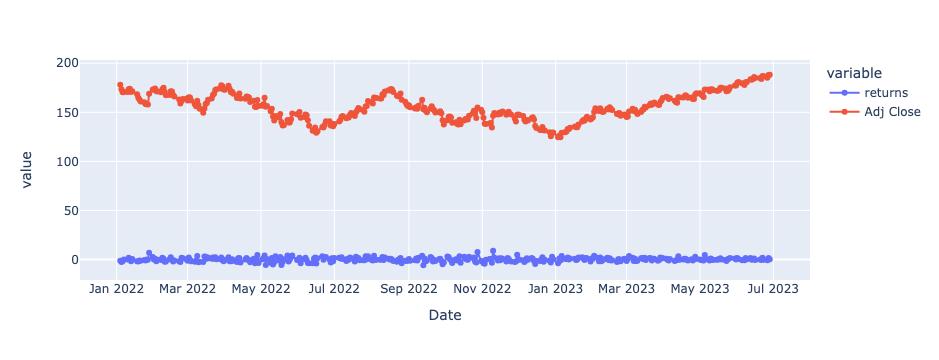

In [22]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
from arch import arch_model
import plotly.express as px


aapl_data = pd.DataFrame(yf.download('AAPL','2022-01-01'))

aapl_data['returns'] = 100 * aapl_data['Adj Close'].pct_change()
aapl_data.dropna(inplace =True, how = 'any')

fig = px.line(aapl_data[['returns','Adj Close']], markers=True)
fig.show()

In [23]:
idx = round(len(aapl_data) * 0.90)
train = aapl_data.returns[:idx]
test = aapl_data.returns[idx:]
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (335,)
Test: (37,)


In [24]:
model = arch_model(train,
                   p=1, q=1,
                   mean='Constant',
                   vol='GARCH',
                   dist='normal')
results = model.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 719.4138369824252
Optimization terminated successfully    (Exit mode 0)
            Current function value: 713.1704067496504
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -713.170
Distribution:                  Normal   AIC:                           1434.34
Method:            Maximum Likelihood   BIC:                           1449.60
                                        No. Observations:                  335
Date:                Wed, Jun 28 2023   Df Residuals:                      334
Time:                        16:25:35   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0889      0.117      0.758      0.448 [ -0.141,  0.319]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1128      0.114      0.986      0.324     [ -0.111,  0.337]
alpha[1]       0.0518  2.127e-02      2.436  1.487e-02 [1.012e-02,9.351e-02]
beta[1]        0.9217  2.535e-02     36.357 2.028e-289     [  0.872,  0.971]
============================================================================

Covariance estimator: robust
"""

<Axes: >

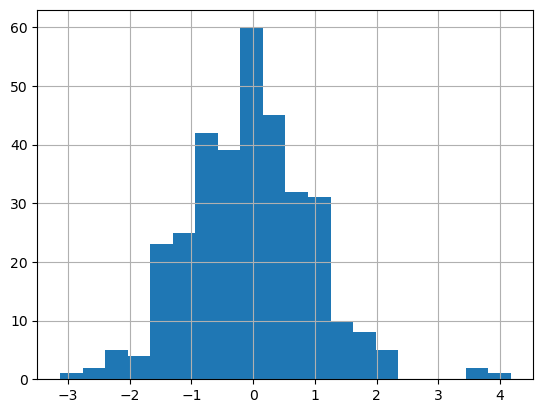

In [26]:
results.std_resid.hist(bins=20)

In [27]:
#Ljung-Box test

from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(results.std_resid,
               lags=10,
               return_df=True)['lb_pvalue']

1     0.930074
2     0.329846
3     0.525668
4     0.646386
5     0.601009
6     0.720279
7     0.807334
8     0.844560
9     0.847216
10    0.852075
Name: lb_pvalue, dtype: float64

In [31]:
#Get the forecast for the horizon choosen

aapl_forecast = results.forecast(horizon = test.shape[0],reindex = True)

In [34]:
forecast = aapl_forecast.variance[-1:]
forecast

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.28,h.29,h.30,h.31,h.32,h.33,h.34,h.35,h.36,h.37
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-04,2.331083,2.382043,2.431651,2.479943,2.526953,2.572716,2.617265,2.660631,2.702847,2.743943,...,3.322481,3.347135,3.371135,3.394498,3.417241,3.43938,3.460932,3.481912,3.502336,3.522217
